# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

np.set_printoptions(suppress=True)  # no usar notacion "e"

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
#boston['data']           # matriz con los datos de entrada (atributos)
#boston['target']         # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. **¿De qué se trata el conjunto de datos?** 

Boston Housing es un conjunto de datos sobre el precio de viviendas de Boston del censo de 1970. Contiene 506 casos e incluye 13 características o atributos que podrían ser indicadores del precio de cada propiedad.

2. **¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**

Variable objetivo: MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares).

3. **¿Qué información (atributos) hay disponibles para hacer la predicción?**
  Atributos:  
*  CRIM: Tasa de criminalidad per cápita por ciudad.
*  ZN: Proporción de suelo residencial zonificado para lotes de más de 25,000 sq.ft (equivalente a 2.223 metros cuadrados).
*  INDUS: Proporción de superficies comerciales no minoristas por ciudad.
*  CHAS: Variable ficticia de Charles River (igual a 1 si el tramo limita con el río; 0 en caso contrario).
*  NOX: Concentración de óxidos nítricos (partes por 10 millones).
*  RM: Número promedio de habitaciones por vivienda.
*  AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
*  DIS: Distancias ponderadas a cinco centros de empleo de Boston.
*  RAD: Índice de accesibilidad a autopistas radiales.
*  TAX: Tasa de impuesto a la propiedad de valor total por $ 10,000.
*  PTRATIO: ratio de alumnos por profesor.
*  B: Se calcula como 1000(Bk - 0.63)^2, donde Bk es la proporción de personas de descendencia Afroamericana por ciudad. 
*  LSTAT: Porcentaje de “población de estatus de bajo nivel”.
*  MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares).


4. **¿Qué atributos imagina ud. que serán los más determinantes para la predicción?**

  Atributos de interés:
* CRIM: Tasa de criminalidad per cápita por ciudad.
* RM: promedio de cuartos por vivienda.
* DIS: distancias ponderadas a cinco centros de empleo de Boston.
* LSTAT: Porcentaje de “población de estatus de bajo nivel”.
* MEDV: Mediana del valor de viviendas en propiedad (en miles de dólares).


5. **¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.**

La variable B hace referencia a la proporción de población afrodescendiente. Esto indica que la presencia de población afrodescendiente incide de manera negativa en el precio de una propiedad, si causa rechazo en grupos sociales blancos trayendo como consecuencia la disminición del valor de la propiedad. 

Considerar esta variable como influyente en el precio de una propiedad demuestra la presencia de un sesgo de contenido social. Este tipo de sesgo se da cuando el conjunto de datos incluye información con sesgos sociales, con estereotipos de género y raza. Entrenar modelos para predecir precios de propiedades teniendo en cuenta esta variable, podría ser problemático por su connotación racista.


##Ejercicio 2: Visualización de los Datos 
1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.

In [4]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


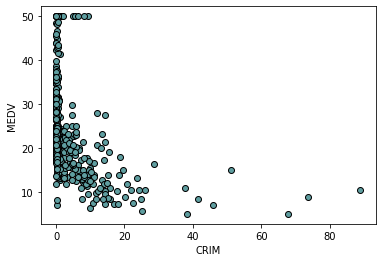

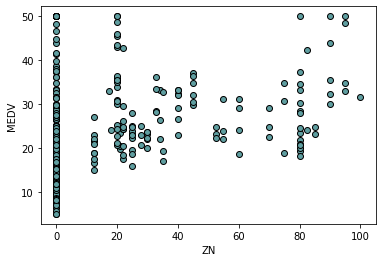

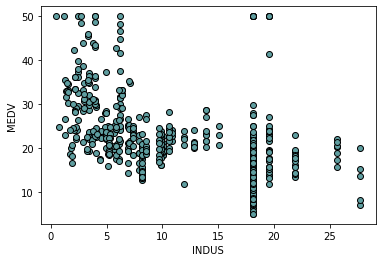

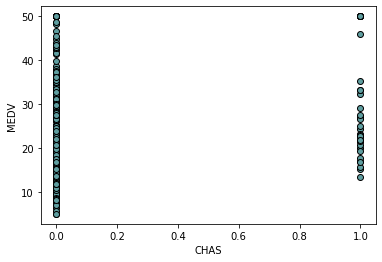

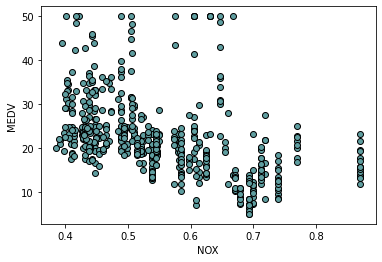

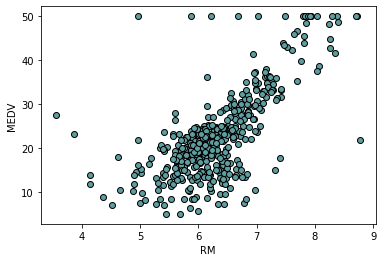

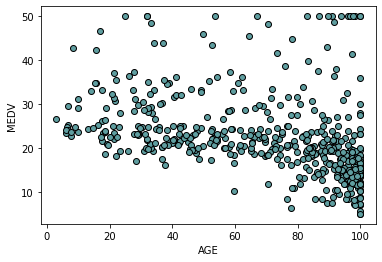

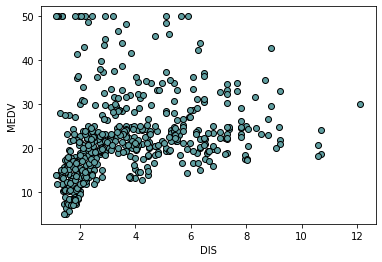

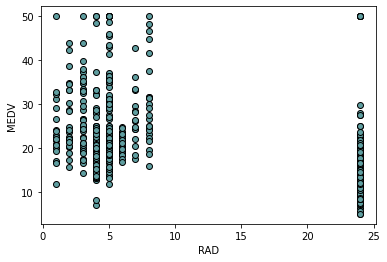

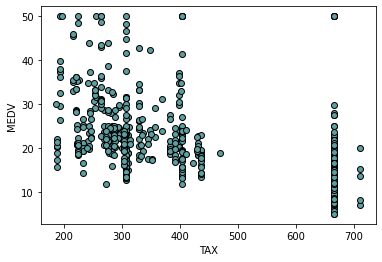

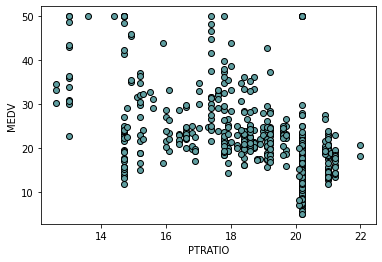

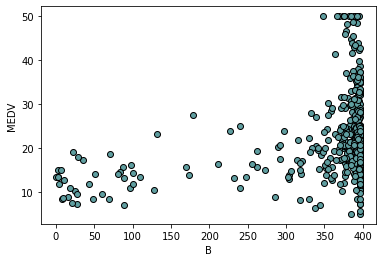

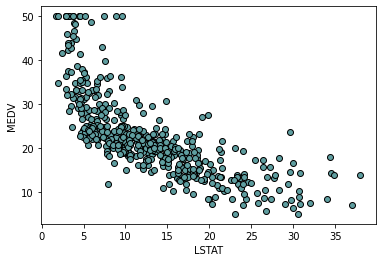

In [5]:
# Gráficos del valor medio de la propiedad en miles de dólares (MEDV) en función de cada atributo:
for feature in boston['feature_names']:
    plt.figure()
    plt.scatter(boston_df[feature], boston_df.MEDV, facecolor="cadetblue", edgecolor="k", label="datos")
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.show()

2. Estudie las gráficas, identificando a ojo los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

Consideramos que los atributos más informativos para predecir el valor medio de la propiedad, son:
1. RM: El valor de la propiedad se incrementa a medida que aumenta la cantidad de habitaciones que presenta.
2. LSTAT: El valor de las propiedades disminuye en función del porcentaje de población de bajo estatus.
3. CRIM: La propiedad pierde valor cuando aumenta el índice de criminalidad.
4. DIS: A medida que aumenta la distancias zonas de trabajo en Boston el valor de la propiedad aumenta.
5. NOX: El valor de las propiedades disminuye con el nivel de contaminación.

## Ejercicio 3: Regresión Lineal 

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [6]:
#1.El atributo seleccionado es RM (Promedio de habitaciones)
atributo = 'RM'
X = boston_df[[atributo]]
y = boston_df.MEDV

In [7]:
# Conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [8]:
# Entreno y predigo
regr = LinearRegression()
regr.fit(X_train, y_train)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [9]:
#Calculo el error
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:0.3}')
print(f'Test error: {test_error:0.3}')

Train error: 42.8
Test error: 46.9


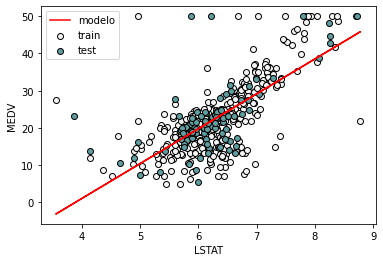

In [10]:
#Grafico del modelo resultante, junto con los puntos de entrenamiento y evaluación.
plt.figure()
plt.scatter(X_train, y_train, facecolor="whitesmoke", edgecolor="k", label="train")
plt.scatter(X_test, y_test, facecolor="cadetblue", edgecolor="k", label="test")
plt.plot(X, regr.predict(X), color="red", label="modelo")
plt.xlabel(feature)
plt.ylabel('MEDV')
plt.legend()
plt.show()

Dado que el error cuadratico medio obtenido no es tan pequeño (> a 0,4), podemos interpretar que la predicción no es demasiado precisa. Sin embargo, para elegir la variable más adecuada  para realizar la predicciòn del precio deberiamos compararla con el valor de las otras.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6]

for degree in degrees:
   # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [12]:
train_errors, test_errors

([85.1437202235075,
  42.82047894172751,
  37.74552897028125,
  36.395658757671086,
  34.808446256913214,
  33.131121571949116,
  33.13011641557084],
 [81.58231743908232,
  46.9073516273953,
  39.794731163726546,
  39.82576208821606,
  41.553925676028065,
  41.038288578720795,
  41.0091769653148])

2. Grafique las curvas de error en términos del grado del polinomio.


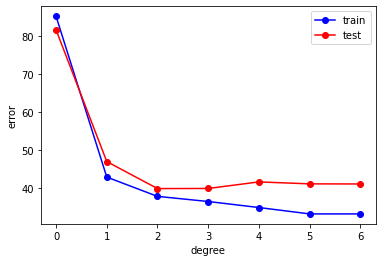

In [13]:
# 2. Graficar curvas de error acá.

plt.plot(degrees, train_errors, color="blue", label="train",marker='o')
plt.plot(degrees, test_errors, color="red", label="test",marker='o')
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.


El modelo que mejor funciona parecería ser el de grado dos:

In [14]:
# Reconstrucción modelo regresión polinomial grado 2

# train:
pf = PolynomialFeatures(2)
lr = LinearRegression(fit_intercept=False)
best_model = make_pipeline(pf, lr)
best_model.fit(X_train, y_train)
    
# predict:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
    
# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

In [15]:
train_error,test_error

(37.74552897028125, 39.794731163726546)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


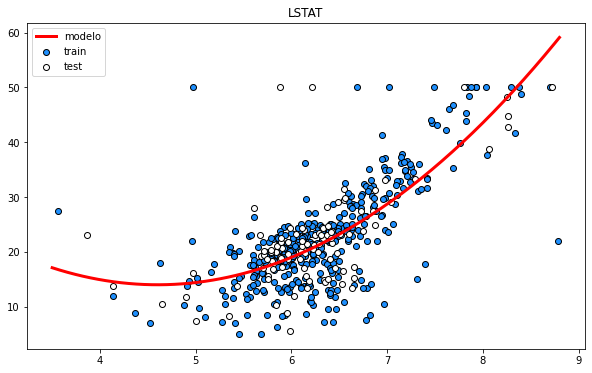

In [16]:
#graficar
x_start = 3.5
x_end = 8.8
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, best_model.predict(x), color="red", label="modelo", linewidth=3)
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [17]:
# 1. Seleción de atributos:
features = ['RM','LSTAT','CRIM']
X_fs = boston_df[features]
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, train_size=0.8, random_state=0)
X_train_fs.shape, X_test_fs.shape, y_train_fs.shape, y_test_fs.shape

((404, 3), (102, 3), (404,), (102,))

In [18]:
# 2. Resolver acá.
train_errors_fs = []
test_errors_fs = []
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train_fs)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error_fs = mean_squared_error(y_train_fs, y_train_pred)
    test_error_fs = mean_squared_error(y_test_fs, y_test_pred)
    train_errors_fs.append(train_error_fs)
    test_errors_fs.append(test_error_fs)

train_errors_fs, test_errors_fs

([27.786404734031777,
  15.833819610510538,
  12.288848370247386,
  8.38141478811907,
  7.811618024216524],
 [38.75831314024691,
  31.84682758745014,
  52.84915450493396,
  43.43722661893817,
  402.47114845641886])

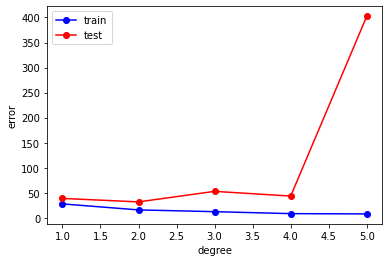

In [19]:
#Gráfico errores
plt.plot(degrees, train_errors_fs, color="blue", label="train",marker='o')
plt.plot(degrees, test_errors_fs, color="red", label="test",marker='o')
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

In [20]:
# Reconstrucción modelo regresión polinomial grado 2

# train:
pf = PolynomialFeatures(2)
lr = LinearRegression(fit_intercept=False)
best_model = make_pipeline(pf, lr)
best_model.fit(X_train_fs, y_train_fs)
    
# predict:
y_train_pred_fs = best_model.predict(X_train_fs)
y_test_pred_fs = best_model.predict(X_test_fs)
    
# evaluate:
train_error = mean_squared_error(y_train_fs, y_train_pred_fs)
test_error = mean_squared_error(y_test_fs, y_test_pred_fs)

train_error, test_error

(15.833819610510528, 31.84682758745297)

3. Los resultados son mejores que en los ejercicios anteriores ya que el error del conjunto de prueba bajó, por ejmplo, comparando con el ejercicio anterior pasó de 39% a 31%. Esto ocurre porque al contar con más atributos en los datos de entrada, el modelo cuenta con información más completa para realizar las predicciones.